# Lecture 12:  Fourier Series

## Background

A summation of sines and cosines can be used to approximate periodic functions.  The Fourier Series is one such series and is given by:

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n cos(nx) + \sum_{m=1}^{\infty} b_m sin(mx)
$$

The coefficients are related to the original function by:

$$
a_n = \frac{1}{\pi} \int^{2\pi}_0 f(s) \cos ns \; ds, \;\; n = 0,1,2,...
$$

and

$$
b_m = \frac{1}{\pi} \int^{2\pi}_0 f(s) \sin ms \; ds, \;\; m = 1,2,...
$$

This series with coefficients determined by the integrals may be used in the solution of [ordinary differential](https://en.wikipedia.org/wiki/Ordinary_differential_equation) and [partial differential equations](https://en.wikipedia.org/wiki/Partial_differential_equation).  In materials engineering you will sometimes see diffusion problems use series solutions to describe the evolution of a concentration field where there is a factor composed of an infinite series and a factor containing an exponential in time.  Together they are selected to describe the diffusive evolution of a system.  A classic example of a [Fourier series](https://en.wikipedia.org/wiki/Fourier_series) in the solution to a diffusion problem is in Jackson and Hunt's paper on eutectic solidification.  In that paper the boundary condition was represented by a Fourier series to model the composition profile across eutectic lamellae.


## What Skills Will I Learn?

* A wave can be described by two parameters:  the frequency and amplitude.
* Arbitrary, periodic functions can be approximated from combinations of individual waves if the frequencies and amplitudes are chosen correctly.
* Sines and cosines are basis vectors and for appropriate definitions of the dot product, orthogonal in a particular (Fourier) space the same way the unit vectors $\hat{i}$, $\hat{j}$, and $\hat{k}$ are orthogonal in Eucledian space.
* A generalized inner (dot) product of functions can be used to compute the correct combinations of frequencies and amplitudes to approximate a function.


## What Steps Should I Take?

1. Compute Fourier coefficients using the inner product of functions.
1. Learn how to shift the functions represented to arbitrary center points and domain widths.
1. Demonstrate that Fourier basis vectors are orthogonal by showing the inner product is zero over some domain.
1. Use a Fourier series to represent a sawtooth wave.
1. Prepare a new notebook (not just modifications to this one) that describes your approach to computing the above items.

## A Sucessful Jupyter Notebook Will

* Demonstrate the student's capability to calculate Fourier Series approximations to functions chosen by the student.
* Identify the audience for which the work is intended;
* Run the code necessary to draw one of the plane groups;
* Provide a narrative and equations to explain why your approach is relevant to solving the problem;
* Provide references and citations to any others' work you use to complete the assignment;
* Be checked into your GitHub repository by the due date (one week from assignment).

A high quality communication provides an organized, logically progressing, blend of narrative, equations, and code that teaches the reader a particular topic or idea.  You will be assessed on:
* The functionality of the code (i.e. it should perform the task assigned).
* The narrative you present.  I should be able to read and learn from it.  Choose your audience wisely.
* The supporting equations and figures you choose to include.

If your notebook is just computer code your assignment will be marked incomplete.


## Reading and Reference

* Essential Mathematical Methods for Physicists, H. Weber and G. Arfken, Academic Press, 2003
* Advanced engineering Mathematics, E. Kreyszig, John wiley and Sons, 2010
* Numerical Recipes, W. Press, Cambridge University Press, 1986
* C. Hammond, The Basics of Crystallography and Diffraction, Oxford Science Publications, 4th ed.
* B. Gustafsson, Fundamentals of Scientific Computing, Springer, 2011
* S. Farlow, Partial Differential Equations for Scientists and Engineers, Dover, 1993

 

### Representations of a Wave
---

A wave:

*  is represented by a frequency and amplitude.
*  is periodic on some domain, usually 0 to 2$\pi$ but can also be $-\pi$ to $\pi$ or anything else.
*  can be summed in combination with other waves to construct more complex functions.

In [1]:
# Note the form of the import statements.  Keep the namespaces from colliding.
%matplotlib inline
import numpy as np
import sympy as sp

def plotSine(amplitude=2.4, frequency=np.pi/3.0, npoints=200):
    """
    Plots a sine function with a user specified amplitude and frequency.
    
    Parameters
    ----------
    amplitude : amplitude of the sine wave.
    
    frequency : the frequency of the sine wave.
    
    npoints : the number of points to use when plotting the wave.
    
    Returns
    -------
    A plot.

    """

    import matplotlib.pyplot as plt
    import numpy as np

    t = np.linspace(0, 2*np.pi, npoints)
    f = amplitude*np.sin(2*np.pi*frequency*t)
    fname = r"$A(t) = A \sin(2 \pi f t)$"
    
    fig, ax = plt.subplots()
    ax.plot(t, f, label=fname)
    ax.legend(loc='upper right')
    ax.set_xlabel(r'$t$', fontsize=18)
    ax.set_ylabel(r'$A$', fontsize=18)
    ax.set_title('A Sine Wave');
    
    plt.show()

    return

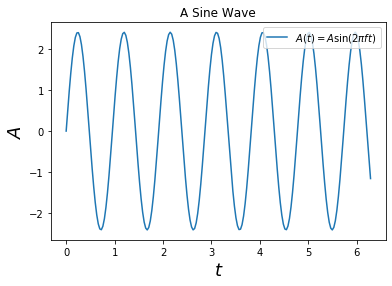

In [2]:
plotSine()

All the properties of the wave are specified with these three pieces of information:

* It is a sine wave
* It has amplitude 2.4
* It has frequency $\pi$/3

In the previous plot we know that the frequency of $2\pi/3$ and coefficient (amplitue) of $2.4$ were linked through the `sin` function.  So it isn't hard to extrapolate to a situation where we might have MANY functions each with their own amplitude.  We could also imagine having many `sin` functions each with a different frequency - so let us make a list of amplitudes and frequencies (numerically) that we can use for plotting.  The following histogram plots the amplitudes for each frequency.

In [3]:
def plotPower(amplitudes=[0,0,1.0,2.0,0,0,0], period=2.0*np.pi, npoints=200):
    """
    Plots a power series and the associated function assuming that the amplitudes
    provided are equally divided over the period of 2\pi unless specified.  Can also 
    change the number of points to represent the function if necessary.
    """
    import matplotlib.pyplot as plt
    import numpy as np
   
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    fig.subplots_adjust(bottom=0.2)

    frequencies = np.linspace(0, period, len(amplitudes))
    t = np.linspace(0, period, npoints)
    
    # Reminder: zip([1,2,3],[4,5,6]) --> [(1,4),(2,5),(3,6)]
    f = sum([amplitude*np.sin(2*np.pi*frequency*t) for (amplitude, frequency) in zip(amplitudes, frequencies)])
    
    ax[0].bar(frequencies, amplitudes)
    ax[0].set_xlabel(r'$f$', fontsize=12)
    ax[0].set_ylabel(r'$A$', fontsize=12)
    ax[0].set_title(r'Power Spectrum')
    
    ax[1].plot(t, f)
    ax[1].set_xlabel(r'$f$', fontsize=12)
    ax[1].set_ylabel(r'$A$', fontsize=12)
    ax[1].set_title(r'Constructed Function')
    
    plt.show()
    
    return

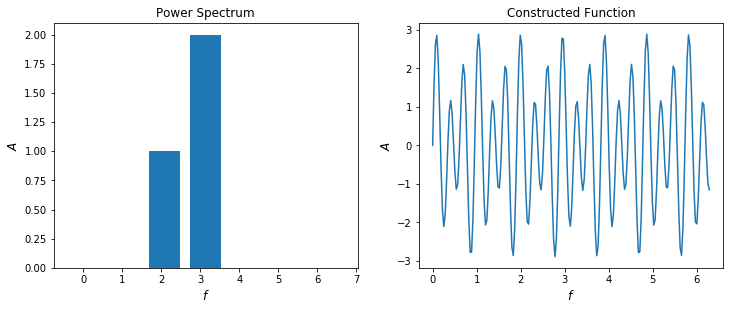

In [4]:
plotPower()

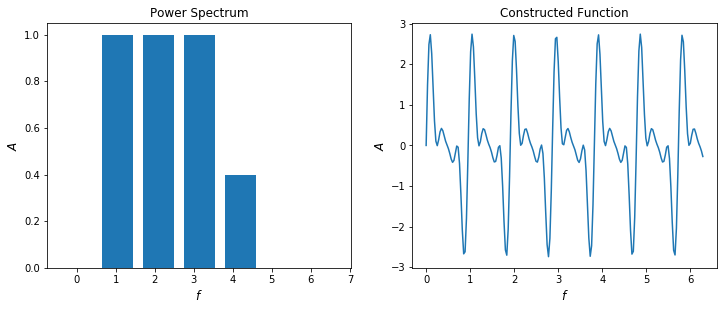

In [5]:
plotPower(amplitudes=[0,1,1,1,0.4,0,0])

The plot above is one common way of visualizing the amplitudes of each term in a series.  Each bar represents the amplitude of a particular frequency in the reconstructed function.

### A Vector Space and Dot Products
----

A vector is an element of a _vector space_.  A vector space is the set of all vectors having dimension N.  

We are introduced to the Euclidian vectors $\hat{i}$, $\hat{j}$, and $\hat{k}$ in physical problems and we gain a physical intuition for orthogonality.  We also learn a mechanism for computing the [dot product](https://en.wikipedia.org/wiki/Dot_product) in Euclidian systems, but other generalizations are possible.  One such generalization is the dot product of functions.

This dot product of functions can be used to determine Fourier coefficients.

In [6]:
t = sp.symbols('t')
sp.init_printing()

def signal(x):
    return (x*(2 - x)*(1 - x)**2)

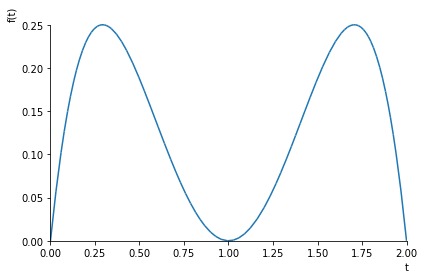

In [7]:
sp.plot(signal(t), (t,0,2));

Is there a way to approximate the function above?  For real functions, the dot product can be generalized by the inner product, defined as:

$$ < f(x) | g(x) > = \int_{-L}^{L} f(x) g(x) dx $$

If this quantity is zero, then the functions are orthogonal. If the functions are orthogonal then they form a function space and can be used to approximate other functions.

The dot product for vectors v and w in Euclidian space has a geometric interpretation:

$$
\mathbf{v} \cdot \mathbf{w} = |v||w| \cos{\theta}
$$

This scalar quantity tells you how much of the vector v points along w, i.e., the magnitude of a vector pointing in the direction of $\hat{v}$ you need to add to some other (mutually orthogonal) vectors in order to reproduce w as a summation. When generalized to functions we write:

$$ 
< f(x) | g(x) > = \int_{-L}^{L} f(x) g(x) dx 
$$

This computes how much of function $f(x)$ is projected onto $g(x)$.  Using a point $x = a$, compute $f(a)$ and $g(a)$. $f(a)$ and $g(a)$ represent the height of each function above/below the x-axis, so a vector from (a, 0) to (a, f(a)) can be dotted with a vector from (a, 0) to (a, g(a)). They are necessarily parallel along the space that contains the x-axis, so their dot product is just the product of their magnitudes:  $f(a)$ times $g(a)$. Now, multiply this by dx to keep the contribution from position $x=a$ proportional to how many additional x-positions you'll do this for. Take this dot product over and over, at each x-position, always scaling by $dx$ to keep it all in proportion. The sum of these dot products is the projection of $f(x)$ onto $g(x)$ (or vice-versa).

### Interactive Visualization of the Dot Product of Functions
----

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

# Somehow we want to add this text to the plot...
# dot_prod_value = sp.integrate(sp.sin(2*x)*sp.sin(x), (x, 0, 2*sp.pi))

def npf(x):
    return np.sin(2*x)

def npg(x):
    return np.sin(x)

def spf(x):
    return sp.sin(2*x)

def spg(x):
    return sp.sin(x)

# Make ff and gg tuples of np/sp functions? - or we can lambdafy the sp functions.
def myfig(ff,gg,a):
    """
    This function's docstring explaining the function.
    """
    x = np.linspace(0, 2*np.pi, 100)
    y1 = ff(x)
    y2 = gg(x)
    y3 = ff(x)*gg(x)
    fig = plt.figure(figsize=(8,5))
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.plot(x, y1, 'r', label=r"$f(x)$")
    axes.arrow(a, 0, 0, ff(a), length_includes_head=True, head_length=0.1, head_width=0.1, color='r')
    axes.plot(x, y2, 'g', label=r"$g(x)$")
    axes.arrow(a, 0, 0, gg(a), length_includes_head=True, head_length=0.1, head_width=0.1, color='g')
    axes.plot(x, y3, 'b', label=r"$f(x) \cdot g(x)$")
    axes.arrow(a, 0, 0, ff(a)*gg(a), length_includes_head=True, head_length=0.1, head_width=0.1, color='b')
    axes.legend()
    axes.grid(True)
    plt.show()
    return

In [9]:
interact(myfig, ff=fixed(npf), gg=fixed(npg), a=(0,np.pi*2,0.05))

interactive(children=(FloatSlider(value=3.1, description='a', max=6.283185307179586, step=0.05), Output()), _d…

<function __main__.myfig(ff, gg, a)>

Using `scipy` we can perform this and other integrations numerically.  Two examples are given for the following functions:

In [10]:
from scipy import integrate
import numpy as np

def myfunc1(x):
    return np.sin(4*x)

def myfunc2(x):
    return np.sin(x)

def myfunc3(x):
    return myfunc1(x)*myfunc2(x)

def myfuncx2(x):
    return x**2

In [11]:
[integrate.quad(myfuncx2, 0, 4), 4.0**3/3.0]

In [12]:
integrate.quad(myfunc3, 0, 2*np.pi)

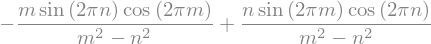

In [13]:
import sympy as sp
sp.init_printing()

n, m = sp.symbols('n m', Integer=True)
x = sp.symbols('x')

def f(x):
    return sp.sin(n*x)

def g(x):
    return sp.sin(m*x)

# scope of variables in def is local.
def func_dot(f, g, lb, ub):
    return sp.integrate(f(x)*g(x), (x, lb, ub))

func_dot(f, g, 0, 2*sp.pi)

### DIY:  Demonstrate the Inner Product of Certain Functions are Zero
----

Identify the conditions under which the inner product of:

$$
<\sin{4x}, \sin{x}>
$$

and 

$$
<\sin{nx}, \sin{mx}>
$$

are zero.

### The Fourier Series Definied on Arbitrary Ranges

This discussion is derived from Sean Mauch's open source Applied Mathematics textbook.  If $f(x)$ is defined over $c-L \leq x \leq c+L $ and $f(x+2L) = f(x)$ then $f(x)$ can be written as:

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n cos \left( \frac{n \pi (x+c)}{L} \right) + \sum_{m=1}^{\infty} b_m sin \left( \frac{m \pi (x+c)}{L} \right)
$$

and the coefficients:

$$ a_n = \langle f(x) | \cos \left( \frac{n\pi (x+c)}{L} \right) \rangle = \frac{1}{L}\int^{c+L}_{c-L} f(x) \cos \frac{n \pi (x+c)}{L} $$

and

$$ b_m = \langle f(x) | \sin \left( \frac{m\pi (x+c)}{L} \right) \rangle = \frac{1}{L}\int^{c+L}_{c-L} f(x) \sin \frac{m \pi (x+c)}{L} $$

Using our generalized dot product for functions as defined above we can compute the Fourier coefficients.  The code for this follows in functions `a_n_amplitudes` and `b_m_amplitudes`.

### Computing the Fourier Coefficients by Hand
----

Note:  These next couple of cells take a few seconds to run.

In [14]:
import sympy as sp
import numpy as np

x = sp.symbols('x')
dum = sp.symbols('dum')
sp.init_printing()

lam = 2
center = 1

def signal(x):
    return (x*(2 - x)*(1 - x)**2)

def mySpecialFunction(x):
    return sp.sin(2*x)

def b_m_amplitudes(n, funToProject, center, lam):
    return (2/lam)*sp.integrate(funToProject(dum)*sp.sin(2*n*sp.pi*dum/lam), (dum,center-lam/2,center+lam/2))

def a_n_amplitudes(m, funToProject, center, lam):
    return (2/lam)*sp.integrate(funToProject(dum)*sp.cos(2*m*sp.pi*dum/lam), (dum,center-lam/2,center+lam/2))

def b_m_vectorspace_element(n, var, lam):
    return sp.sin(2*n*sp.pi*var/lam)

def a_n_vectorspace_element(m, var, lam):
    if m==0:
        return sp.Rational(1,2)
    elif m!=0:
        return sp.cos(2*m*sp.pi*var/lam)

In [15]:
terms = 3
funToProject = signal

an_vectors = [a_n_vectorspace_element(n, x, lam) for n in range(terms)]
an_amplitudes = [a_n_amplitudes(n, funToProject, center, lam) for n in range(terms)]
bm_vectors = [b_m_vectorspace_element(m, x, lam) for m in range(terms)]
bm_amplitudes = [b_m_amplitudes(m, funToProject, center, lam) for m in range(terms)]

We use a list comprehension to collect the basis vectors and amplitudes into a useful data structure through the `zip` function.

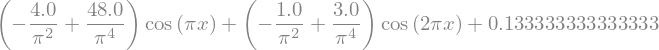

In [16]:
truncatedSeries = (sum([a*b for a,b in zip(an_vectors,an_amplitudes)]) 
                   + sum([c*d for c,d in zip(bm_vectors,bm_amplitudes)]))
truncatedSeries

We can now plot this series and see the comparison of the signal (blue) and the series representation (red).  We can quantitatively describe the accuracy between the approximation and the function.

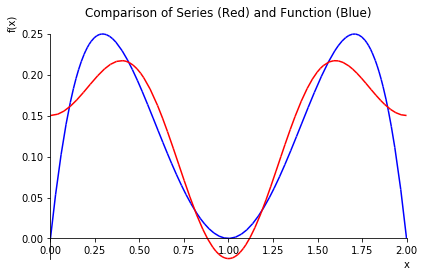

In [17]:
p = sp.plot(signal(x), truncatedSeries, (x, 0, 2), show=False, title=r'Comparison of Series (Red) and Function (Blue)')
p[0].line_color = 'blue'
p[1].line_color = 'red'
p.show()

It is also possible to unpack the series above and look at the plot of each individual term's contribution to the approximate function.

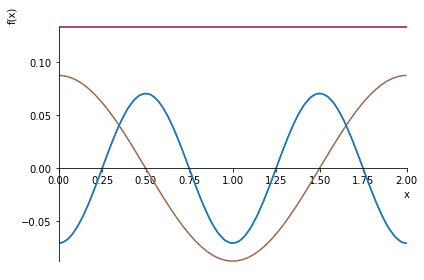

In [18]:
test = [c*d for c,d in zip(an_vectors,an_amplitudes)]

p2 = sp.plot(test[0],(x,0,2), show=False)

#[p2.append(sp.plot(test[i], (x,0,2), show=False)[0]) for i in range(1,5,1)]

[p2.append(sp.plot(i, (x,0,2), show=False)[0]) for i in test]

for i in range(1,terms,1):
    #p = sp.plot(test[i], (x,0,2), show=False)
    #p2.append(p[0])
    p2[i].line_color = 1.0-i/5.0,i/5.0,0.3

[p2.append(sp.plot(test[i], (x,0,2), show=False)[0])]
    
p2.show()

### Computing the Fourier Coefficients using Sympy
----

Here we use `sympy`'s `fourier_series` function to build a truncated series. We plot the series so that you can explore what happens when you change the number of terms.  The `interact` command creates a widget you can use to explore the effect of changing the nubmer of terms.

In [19]:
import sympy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

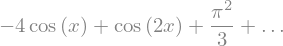

In [20]:
sp.fourier_series(x**2)

In [21]:
sp.init_printing()

x = sp.symbols('x')

def myAwesomeFunction(a):
    return a

def fsMyFunc(terms, var):
    return sp.fourier_series(myAwesomeFunction(var), (var, -sp.pi, sp.pi)).truncate(n=terms)

def plotMyFunc(terms):
    p1 = sp.plot(fsMyFunc(terms,x),(x,-sp.pi, sp.pi), show=False, line_color='r')
    p2 = sp.plot(myAwesomeFunction(x), (x,-sp.pi,sp.pi), show=False, line_color='b') 
    p2.append(p1[0])
    p2.show()
    return None

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = 8, 6

In [22]:
interact(plotMyFunc, terms=(1,10,1));

interactive(children=(IntSlider(value=5, description='terms', max=10, min=1), Output()), _dom_classes=('widget…

### DIY:  Series for a Sawtooth Wave 
----

Using a Fourier series, represent the following periodic function:

$$f(x) = \left\{ 
\begin{array}{ll}
 x, & 0 \leq x \leq \pi, \\
 x-2\pi, & \pi \leq x \leq 2\pi,
\end{array}
\right.$$

### DIY:  Compute Your Own
----

Compute a Fourier series for a function of your choosing.  Think about the restrictions on the use of the Fourier series.